In [14]:
import seaborn                   # 데이타
import matplotlib.pyplot as plt  # 그래프 라이브러리

tips = seaborn.load_dataset('tips') # 팁을 지불한 손님의 정보 데이타
tips   # 지불금액 / 팁 / 성별 / 흡연 / 요일 / 시간대 / 인원수

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
# 한글처리

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus']=False  # 추가설정 : 폰트를 변경하면 -표시가 ㅁ으로 변경되기에 '-'를 변경하지 않도록 지정
rc('font', family='Malgun Gothic')

## 1. 일변량 그래프 - 하나의 변수만 사용한 그래프

- 히스토그램(수치변수)

- 막대그래프(범주변수)

  [예] 전체지불금액(total_bill)에 대한 그래프

<BarContainer object of 2 artists>

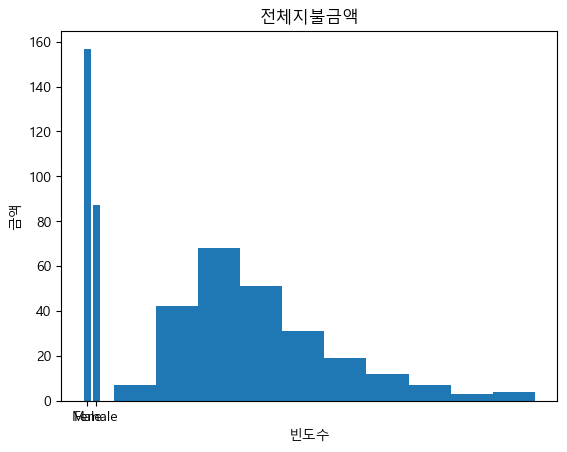

In [15]:
# 여기에 코드
plt.hist( tips['total_bill'])
plt.title('전체지불금액')
plt.xlabel('빈도수')
plt.ylabel('금액')

sex = tips['sex'].value_counts()
plt.bar(['Male','Female'],sex)


##  2. 이변량 그래프 - 변수 2개를 이용한 그래프 ( 산점도 그래프 )
    [예] 지불금액에 따른 팁 금액을 나타내는 그래프

Text(0, 0.5, '빈도수')

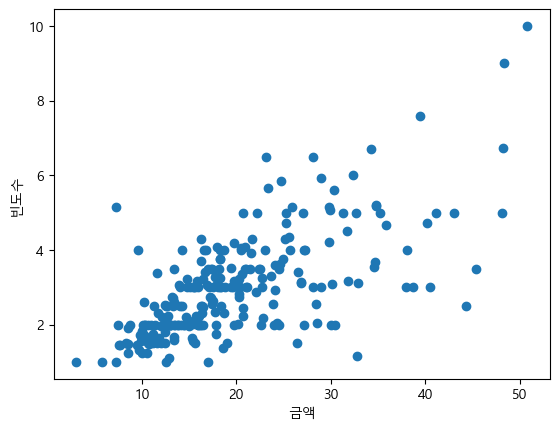

In [19]:
# 여기에 코드
plt.scatter(tips['total_bill'],tips['tip'])
plt.xlabel('금액')
plt.ylabel('빈도수')

## 3. 이산형 변수와 연속형 변수 - 박스플롯
    이산형 - 성별이나 국적처럼 명확하게 구분되는 값
    연속형 - 수치로 이루어진 값

    [예] 성별에 따른 팁을 나타내는 그래프

{'whiskers': [<matplotlib.lines.Line2D at 0x2f4fe09f5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f4fe09fb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f4fe09f340>,
 'medians': [<matplotlib.lines.Line2D at 0x2f4fe0d40a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2f4fe0d4340>,
 'means': []}

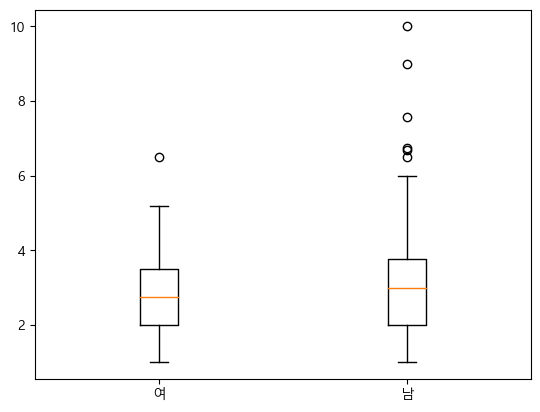

In [26]:
# 여기에 코드
female = tips[tips['sex']=='Female']['tip']
male = tips[tips['sex']=='Male']['tip']
plt.boxplot([female, male], labels=['여','남'])

##  4. 다변량 그래프 - 3개 이상의 변수로 그래프 - 산점도 그래프

      [예] 식사지불과 팁의 정도를 성별에 따라 그래프를 그린다면?
      
      * 성별의 문자열값을 0과 1로 변경하여 다른 색상으로 그리고자 한다

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


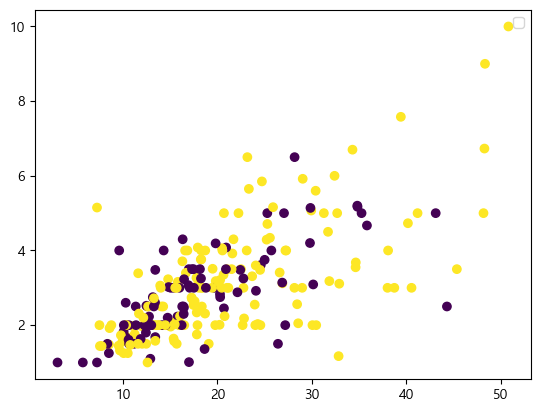

In [32]:
# (1) 성별을 0과 1로 변환하는 함수 선언

def gender(sex):
    if sex == 'Female':
        return 0
    else:
        return 1 
    
# (2) 변경한 성별값의 변수(컬럼 sex_col) 추가
tips['sex_color'] = tips['sex'].apply(gender)
tips.head()

# (3) 그래프 : x와 y 축, c=점의 색상, alpha=점의 투명도, s=점의 크기
#    테이블당의 인원수를 점의 크기로 표현한다면 s=tips['size']*10 추가

plt.scatter(x=tips['total_bill'], y=tips['tip'], c=tips['sex_color'])



[ 참고 ]  plt.scatter와 plt.plot 정리
